In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("../data/credit.csv")

In [3]:
df.head()

,default,amount,grade,years,ownership,income,age
0,0,1000,B,2.0,RENT,19200.0,24
1,1,6500,A,2.0,MORTGAGE,66000.0,28
2,0,2400,A,2.0,RENT,60000.0,36
3,0,10000,C,3.0,RENT,62000.0,24
4,1,4000,C,2.0,RENT,20000.0,28


In [4]:
### Data Exploration
import matplotlib.pyplot as plt

In [9]:
## See how default changes wrt each variable
df['amount_deciles'] = pd.qcut(df['amount'],10,labels=False)
df['income_deciles'] = pd.qcut(df['income'],10,labels=False)
df['age_deciles'] = pd.qcut(df['age'],10,labels=False)

<Axes: xlabel='amount_deciles'>

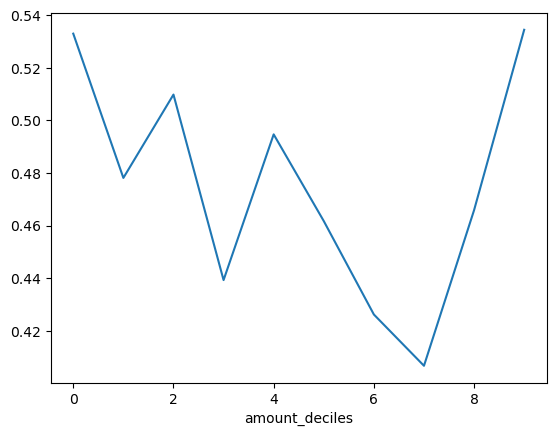

In [10]:
df.groupby('amount_deciles')['default'].mean().plot()

<Axes: xlabel='income_deciles'>

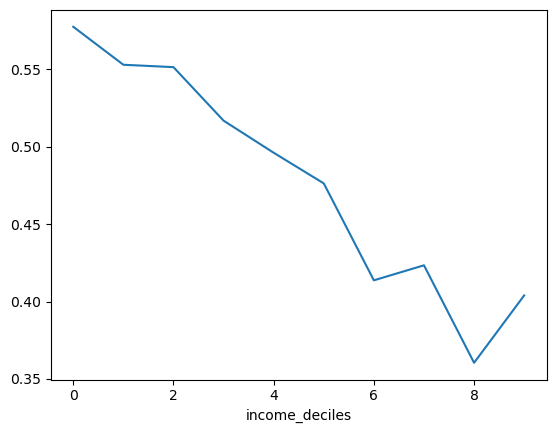

In [11]:
df.groupby('income_deciles')['default'].mean().plot()

<Axes: xlabel='age_deciles'>

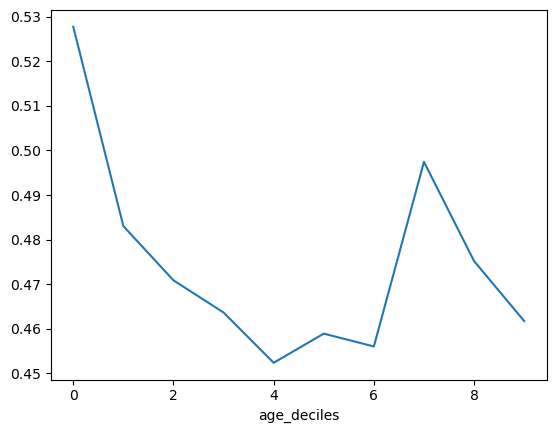

In [12]:
df.groupby('age_deciles')['default'].mean().plot()

<Axes: xlabel='grade'>

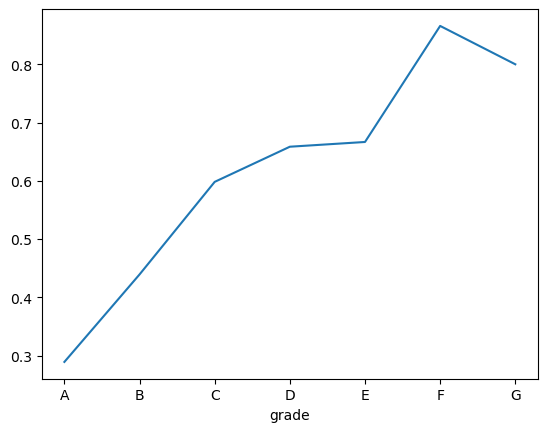

In [13]:
df.groupby('grade')['default'].mean().plot()

<Axes: xlabel='ownership'>

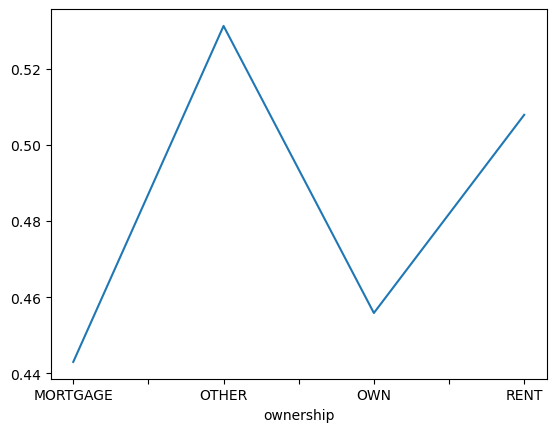

In [15]:
df.groupby('ownership')['default'].mean().plot()

In [16]:
df.isnull().sum()

default             0
amount              0
grade               0
years             279
ownership           0
income              0
age                 0
amount_deciles      0
income_deciles      0
age_deciles         0
dtype: int64

In [19]:
### Data prep
df = df.dropna()
df = pd.get_dummies(df)

In [20]:
df.head(2)

,default,amount,years,income,age,amount_deciles,income_deciles,age_deciles,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,ownership_MORTGAGE,ownership_OTHER,ownership_OWN,ownership_RENT
0,0,1000,2.0,19200.0,24,0,0,2,0,1,0,0,0,0,0,0,0,0,1
1,1,6500,2.0,66000.0,28,3,6,6,1,0,0,0,0,0,0,1,0,0,0


In [21]:
X=df.drop('default',axis=1).values
y=df['default'].values

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80,random_state=200)

In [26]:
### Model Training
from sklearn.tree import DecisionTreeClassifier

In [28]:
clf=DecisionTreeClassifier(max_depth=3,random_state=200)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.6268456375838927

In [29]:
import sklearn.metrics as metrics
metrics.roc_auc_score(y_test,clf.predict_proba(X_test)[:,1])

0.6567139525143699

In [30]:
### GridSearch
import sklearn.model_selection as model_selection
clf=DecisionTreeClassifier(max_depth=3,random_state=200)
mod=model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6]})
mod.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=3, random_state=200),
             param_grid={'max_depth': [2, 3, 4, 5, 6]})

In [32]:
m = mod.best_estimator_

In [34]:
### Persist sklearn models
from joblib import dump, load
dump(m, '../assets/tree.joblib') 

['../assets/tree.joblib']